# 02 – Boxplots de PM10 por Mes y Día de la Semana

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE = '..'
RAW = os.path.join(BASE, 'data', 'raw', 'Calidad_del_Aire_20250814.csv')
PROCESSED = os.path.join(BASE, 'data', 'processed', 'Calidad_del_Aire_enriquecido.csv')
REPORTS = os.path.join(BASE, 'reports')
FIGS = os.path.join(REPORTS, 'figures')

os.makedirs(REPORTS, exist_ok=True)
os.makedirs(FIGS, exist_ok=True)

# Cargar enriquecido si existe; si no, cargar crudo y enriquecer
if os.path.exists(PROCESSED):
    df = pd.read_csv(PROCESSED)
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['Medicion'] = pd.to_numeric(df['Medicion'], errors='coerce')
else:
    df = pd.read_csv(RAW)
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['Medicion'] = pd.to_numeric(df['Medicion'], errors='coerce')
    df['Dia'] = df['Fecha'].dt.day
    df['Mes'] = df['Fecha'].dt.month
    df['Año'] = df['Fecha'].dt.year
    dias_map = {'Monday':'lunes','Tuesday':'martes','Wednesday':'miércoles','Thursday':'jueves','Friday':'viernes','Saturday':'sábado','Sunday':'domingo'}
    df['DiaSemana'] = df['Fecha'].dt.day_name().map(dias_map)
    os.makedirs(os.path.dirname(PROCESSED), exist_ok=True)
    df.to_csv(PROCESSED, index=False)

# Asegurar columnas clave por si vienen faltantes
if 'Dia' not in df.columns: df['Dia'] = df['Fecha'].dt.day
if 'Mes' not in df.columns: df['Mes'] = df['Fecha'].dt.month
if 'Año' not in df.columns: df['Año'] = df['Fecha'].dt.year
if 'DiaSemana' not in df.columns:
    dias_map = {'Monday':'lunes','Tuesday':'martes','Wednesday':'miércoles','Thursday':'jueves','Friday':'viernes','Saturday':'sábado','Sunday':'domingo'}
    df['DiaSemana'] = df['Fecha'].dt.day_name().map(dias_map)

df.head()

,Municipio,Estacion,Fecha,Diametro aerodinamico,Medicion,Dia,Mes,Año,DiaSemana
0,Santa Rosa de Cabal,Centro Urbano,2008-06-09,PM10,21.83,9,6,2008,lunes
1,Santa Rosa de Cabal,Centro Urbano,2008-06-10,PM10,29.98,10,6,2008,martes
2,Santa Rosa de Cabal,Centro Urbano,2008-06-11,PM10,13.82,11,6,2008,miércoles
3,Santa Rosa de Cabal,Centro Urbano,2008-06-12,PM10,32.61,12,6,2008,jueves
4,Santa Rosa de Cabal,Centro Urbano,2008-06-13,PM10,27.61,13,6,2008,viernes


## Resumenes descriptivos por municipio y por estacion

In [2]:
# Resumen por municipio y por estación
resumen_municipio = df.groupby('Municipio')['Medicion'].describe()
resumen_estacion = df.groupby('Estacion')['Medicion'].describe()

# Guardar a reports/ para trazabilidad en el repo
resumen_municipio.to_csv(os.path.join(REPORTS, 'resumen_por_municipio.csv'))
resumen_estacion.to_csv(os.path.join(REPORTS, 'resumen_por_estacion.csv'))

resumen_municipio, resumen_estacion.head()

(                      count       mean        std   min     25%    50%  \
 Municipio                                                                
 Dosquebradas         1976.0  30.182834  17.178645  1.00  15.365  28.80   
 La Virginia           743.0  22.803607  10.554085  0.00  15.610  21.40   
 Pereira              1507.0  28.598792  15.472956  0.00  18.940  25.58   
 Santa Rosa de Cabal   817.0  30.568605  14.045536  3.65  18.950  30.24   
 
                          75%     max  
 Municipio                             
 Dosquebradas         40.8275  116.00  
 La Virginia          27.8750   73.31  
 Pereira              34.9350  149.59  
 Santa Rosa de Cabal  40.1000   75.16  ,
                        count       mean        std   min     25%    50%  \
 Estacion                                                                  
 Balalaika             1976.0  30.182834  17.178645  1.00  15.365  28.80   
 Centro                1507.0  28.598792  15.472956  0.00  18.940  25.58   
 Ce

## Histograma por municipio

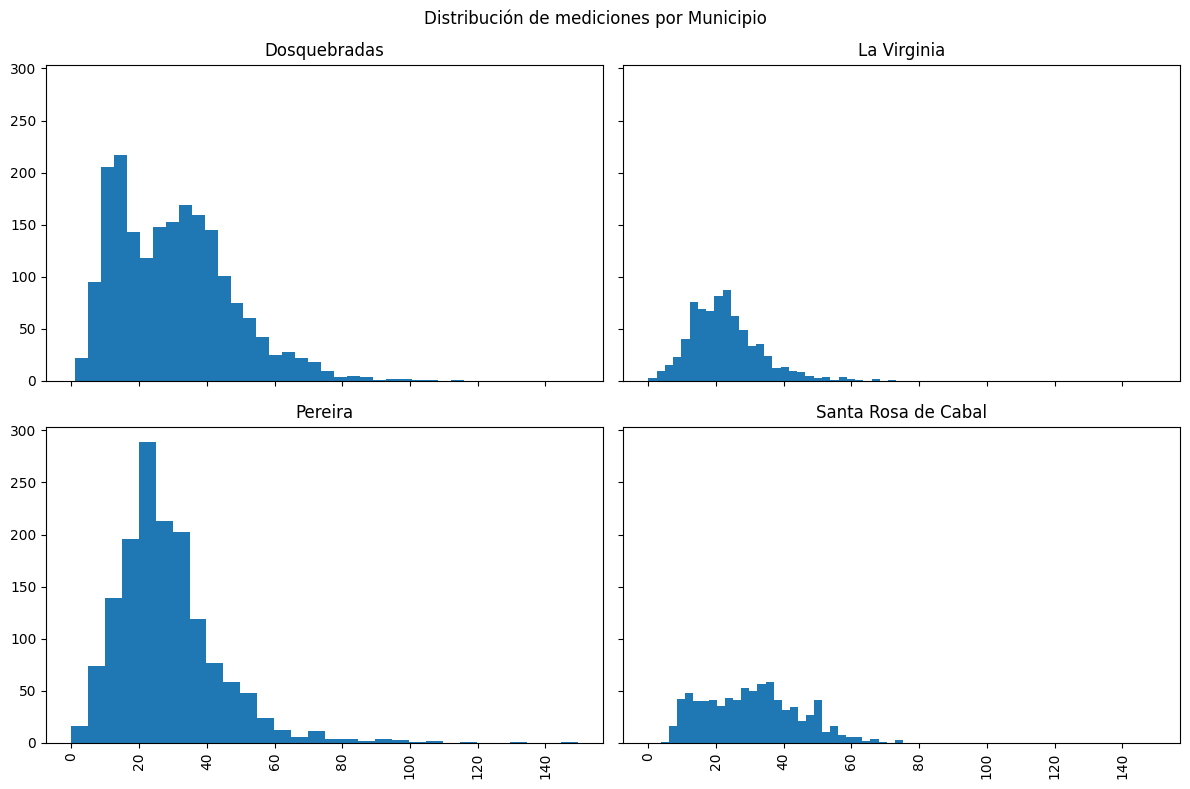

<Figure size 640x480 with 0 Axes>

In [3]:
df.hist(
    column='Medicion',
    by='Municipio',
    bins=30,
    figsize=(12,8),
    layout=(2,2),
    sharex=True,
    sharey=True
)
plt.suptitle('Distribución de mediciones por Municipio')
plt.tight_layout()
plt.show()

# Opcional: guardar
plt.figure()  # evitar guardar la figura múltiple de hist directamente
df.hist(column='Medicion', by='Municipio', bins=30, figsize=(12,8), layout=(2,2), sharex=True, sharey=True)
plt.suptitle('Distribución de mediciones por Municipio')
plt.savefig(os.path.join(FIGS, 'hist_medicion_por_municipio.png'), bbox_inches='tight')
plt.close()

## Serie temporal por estación

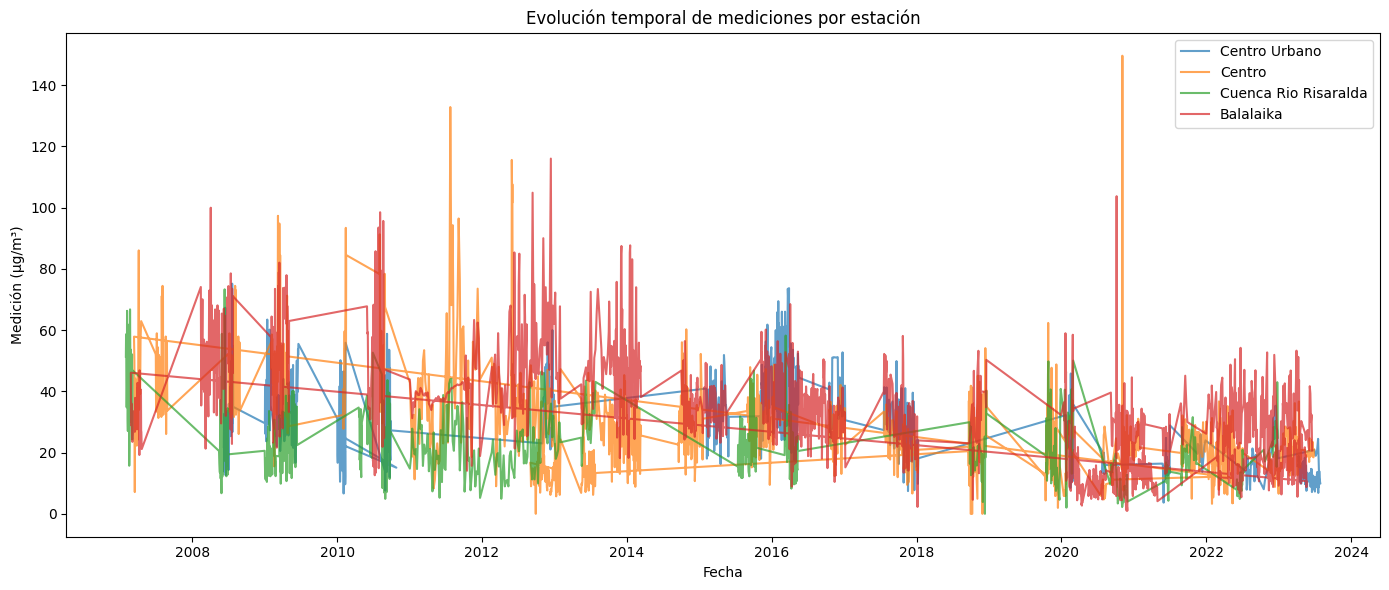

In [4]:
plt.figure(figsize=(14,6))
for estacion in df['Estacion'].dropna().unique():
    subset = df[df['Estacion'] == estacion]
    plt.plot(subset['Fecha'], subset['Medicion'], label=estacion, alpha=0.7)
plt.title('Evolución temporal de mediciones por estación')
plt.xlabel('Fecha'); plt.ylabel('Medición (µg/m³)')
plt.legend()
plt.tight_layout()
plt.show()

# Guardar
plt.figure(figsize=(14,6))
for estacion in df['Estacion'].dropna().unique():
    subset = df[df['Estacion'] == estacion]
    plt.plot(subset['Fecha'], subset['Medicion'], label=estacion, alpha=0.7)
plt.title('Evolución temporal de mediciones por estación')
plt.xlabel('Fecha'); plt.ylabel('Medición (µg/m³)')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(FIGS, 'serie_temporal_por_estacion.png'), bbox_inches='tight')
plt.close()

## Promedio por día de la semana 

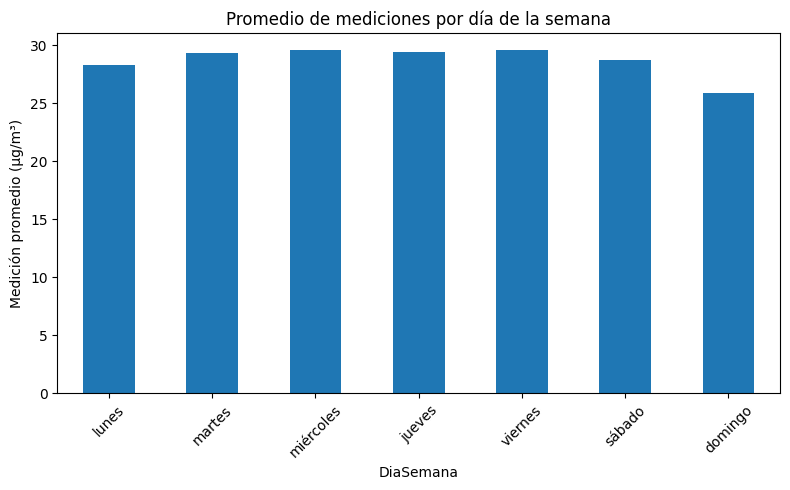

In [8]:
dias_orden = ['lunes','martes','miércoles','jueves','viernes','sábado','domingo']

plt.figure(figsize=(8,5))
(df.groupby('DiaSemana')['Medicion'].mean()
  .reindex(dias_orden)
).plot(kind='bar')
plt.title('Promedio de mediciones por día de la semana')
plt.ylabel('Medición promedio (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar
plt.figure(figsize=(8,5))
(df.groupby('DiaSemana')['Medicion'].mean()
  .reindex(dias_orden)
).plot(kind='bar')
plt.title('Promedio de mediciones por día de la semana')
plt.ylabel('Medición promedio (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(FIGS, 'promedio_por_dia_semana.png'), bbox_inches='tight')
plt.close()

## Promedio por mes 

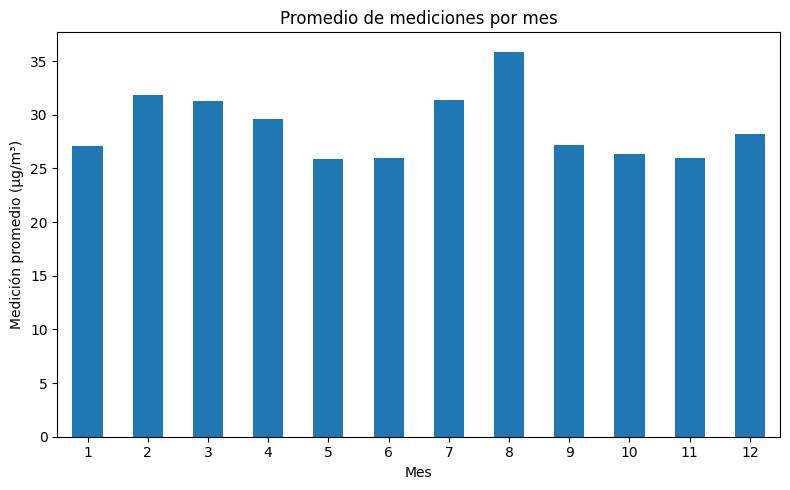

In [9]:
plt.figure(figsize=(8,5))
df.groupby('Mes')['Medicion'].mean().sort_index().plot(kind='bar')
plt.title('Promedio de mediciones por mes')
plt.ylabel('Medición promedio (µg/m³)')
plt.xlabel('Mes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Guardar
plt.figure(figsize=(8,5))
df.groupby('Mes')['Medicion'].mean().sort_index().plot(kind='bar')
plt.title('Promedio de mediciones por mes')
plt.ylabel('Medición promedio (µg/m³)')
plt.xlabel('Mes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(FIGS, 'promedio_por_mes.png'), bbox_inches='tight')
plt.close()

## Heatmap Mes × Día de la semana

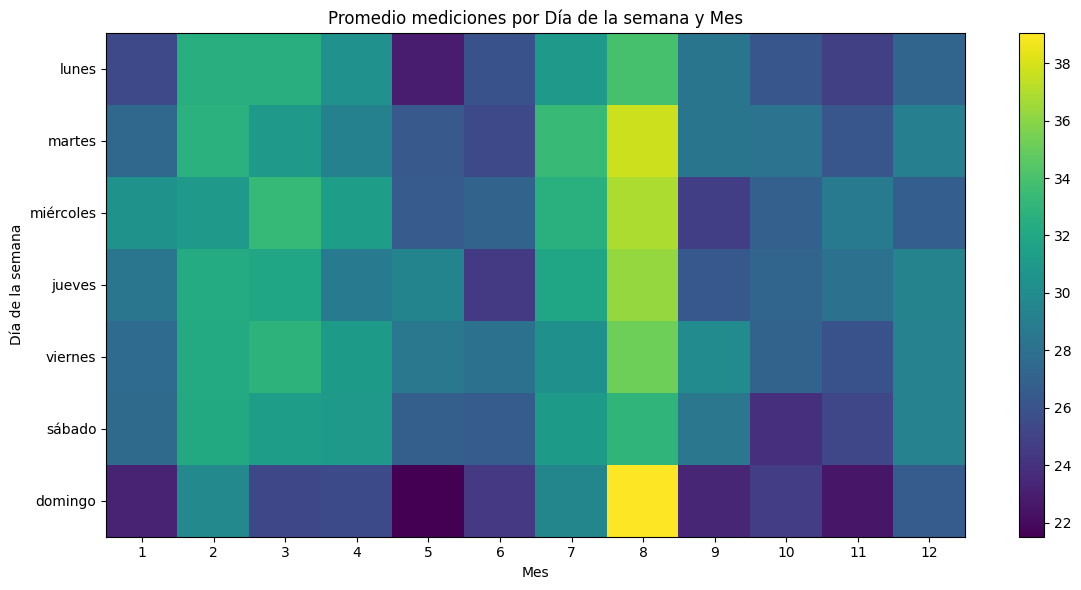

In [11]:
# Pivot y orden
dias_orden = ['lunes','martes','miércoles','jueves','viernes','sábado','domingo']
pivot = df.pivot_table(values='Medicion', index='DiaSemana', columns='Mes', aggfunc='mean')
pivot = pivot.reindex(dias_orden)
pivot = pivot.reindex(columns=sorted([c for c in pivot.columns if pd.notnull(c)]))

plt.figure(figsize=(12,6))
plt.imshow(pivot.values, aspect='auto')
plt.title('Promedio mediciones por Día de la semana y Mes')
plt.ylabel('Día de la semana')
plt.xlabel('Mes')
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

# Guardar
plt.figure(figsize=(12,6))
plt.imshow(pivot.values, aspect='auto')
plt.title('Promedio mediciones por Día de la semana y Mes')
plt.ylabel('Día de la semana'); plt.xlabel('Mes')
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns)
plt.colorbar()
plt.tight_layout()
plt.savefig(os.path.join(FIGS, 'heatmap_mes_dia_semana.png'), bbox_inches='tight')
plt.close()

## Boxplot por mes

<Figure size 1000x600 with 0 Axes>

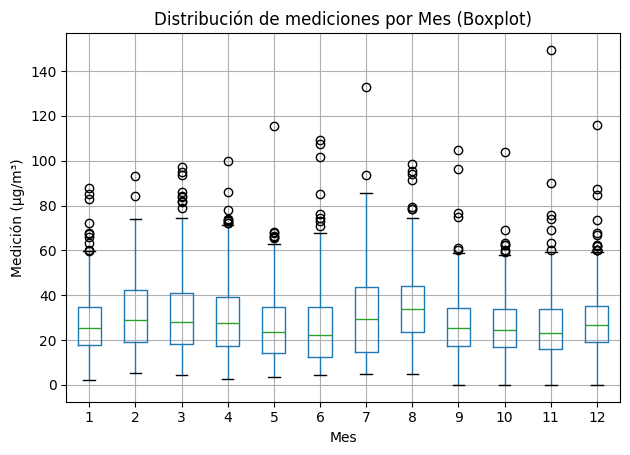

<Figure size 1000x600 with 0 Axes>

In [12]:
plt.figure(figsize=(10,6))
df.boxplot(column='Medicion', by='Mes')
plt.title('Distribución de mediciones por Mes (Boxplot)')
plt.suptitle('')
plt.xlabel('Mes'); plt.ylabel('Medición (µg/m³)')
plt.tight_layout()
plt.show()

# Guardar
plt.figure(figsize=(10,6))
df.boxplot(column='Medicion', by='Mes')
plt.title('Distribución de mediciones por Mes (Boxplot)')
plt.suptitle('')
plt.xlabel('Mes'); plt.ylabel('Medición (µg/m³)')
plt.tight_layout()
plt.savefig(os.path.join(FIGS, 'boxplot_por_mes.png'), bbox_inches='tight')
plt.close()

## Boxplot por día de la semana

<Figure size 1000x600 with 0 Axes>

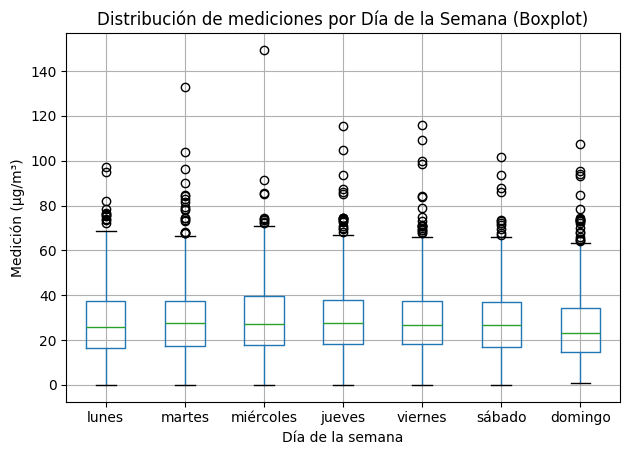

<Figure size 1000x600 with 0 Axes>

In [13]:
dias_orden = ['lunes','martes','miércoles','jueves','viernes','sábado','domingo']
df['DiaSemana'] = pd.Categorical(df['DiaSemana'], categories=dias_orden, ordered=True)

plt.figure(figsize=(10,6))
df.boxplot(column='Medicion', by='DiaSemana')
plt.title('Distribución de mediciones por Día de la Semana (Boxplot)')
plt.suptitle('')
plt.xlabel('Día de la semana'); plt.ylabel('Medición (µg/m³)')
plt.tight_layout()
plt.show()

# Guardar
plt.figure(figsize=(10,6))
df.boxplot(column='Medicion', by='DiaSemana')
plt.title('Distribución de mediciones por Día de la Semana (Boxplot)')
plt.suptitle('')
plt.xlabel('Día de la semana'); plt.ylabel('Medición (µg/m³)')
plt.tight_layout()
plt.savefig(os.path.join(FIGS, 'boxplot_por_dia_semana.png'), bbox_inches='tight')
plt.close()